In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [2]:
# Connect to SQLite database
con = sqlite3.connect('./data/sd_competencia/sd_competencia_db.db')
cur = con.cursor()

In [3]:
# Create dataframe from connection

df = pd.read_sql_query('SELECT * FROM Demanda_Historica', con)
df.head()


,id_llegada,fecha_llegada,hora_llegada,tipo_vehiculo,CCA0001_SN_01,CCA0001_SB_01,CCA0001_SG_01,CCA0001_SC_01,CCA0001_SN_02,CCA0001_SB_02,...,CT0008_03033,CT0008_03034,CT0008_03035,CT0008_03036,CT0008_03041,CT0008_03042,CT0008_03043,CT0008_03044,CT0008_03045,CT0008_03046
0,1,2023-03-01 00:00:00,00:36:36,Camion,1,0,3,0,0,0,...,10,0,0,0,0,0,0,7,0,0
1,2,2023-03-01 00:00:00,06:30:45,Camion,0,2,2,0,5,5,...,0,0,0,0,0,6,3,8,0,0
2,3,2023-03-01 00:00:00,06:32:33,Camion,0,0,2,3,3,0,...,6,0,4,8,0,0,4,0,0,0
3,4,2023-03-01 00:00:00,07:26:02,Tracto-Camion,0,6,0,0,0,0,...,8,0,0,7,0,0,0,0,0,0
4,5,2023-03-01 00:00:00,07:46:43,Tracto-Camion,3,0,1,2,3,0,...,8,0,0,0,0,0,0,0,0,0


In [4]:
# Dropping unnecessary columns

df = df.drop(columns={'id_llegada', 'tipo_vehiculo', 'hora_llegada'})


In [5]:
# Grouping SKUs by date

df['fecha_llegada'] = pd.to_datetime(df['fecha_llegada'])

df = df.groupby('fecha_llegada').sum().reset_index()

df = df.set_index('fecha_llegada')


df.head()


,CCA0001_SN_01,CCA0001_SB_01,CCA0001_SG_01,CCA0001_SC_01,CCA0001_SN_02,CCA0001_SB_02,CCA0001_SG_02,CCA0001_SC_02,CCA0001_SN_03,CCA0001_SB_03,...,CT0008_03033,CT0008_03034,CT0008_03035,CT0008_03036,CT0008_03041,CT0008_03042,CT0008_03043,CT0008_03044,CT0008_03045,CT0008_03046
fecha_llegada,,,,,,,,,,,,,,,,,,,,,
2023-03-01,160,232,167,198,200,196,146,153,130,75,...,129,43,58,74,80,28,102,89,16,73
2023-03-02,202,212,194,236,178,140,135,158,157,71,...,54,132,46,41,84,58,85,66,48,86
2023-03-03,162,151,166,143,145,182,170,175,118,80,...,63,82,95,60,102,49,107,69,62,84
2023-03-04,210,212,227,185,171,195,268,215,118,86,...,113,95,44,56,104,49,95,58,49,137
2023-03-05,32,15,39,37,29,28,21,22,15,13,...,9,15,0,17,8,21,41,7,10,0


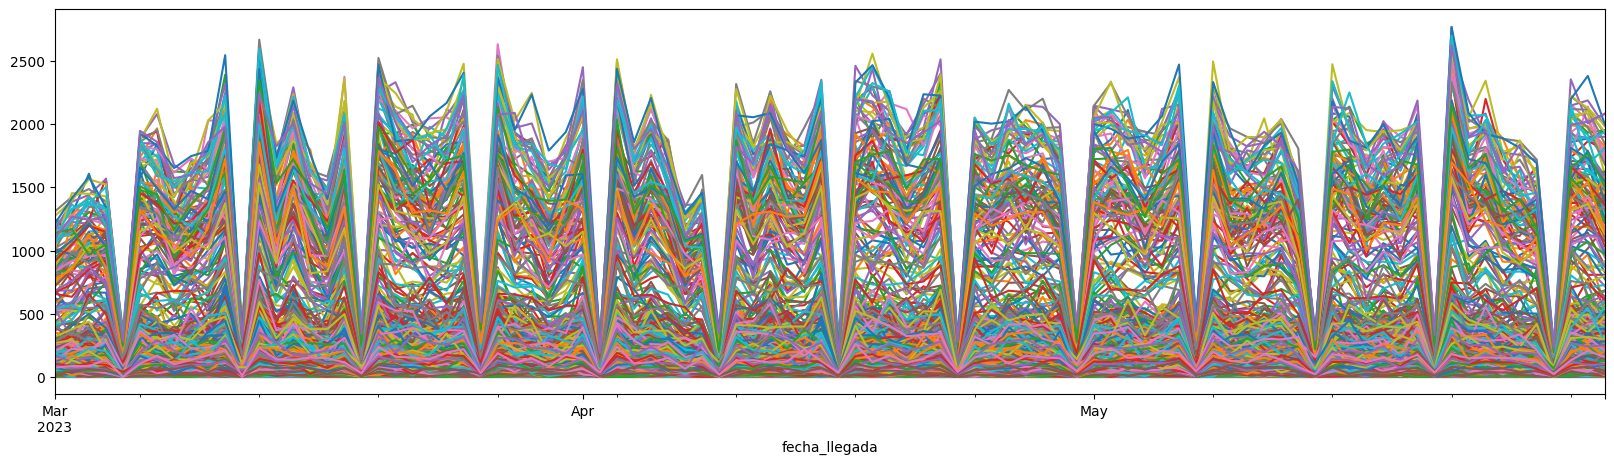

In [6]:
# Plotting general demand

ax = df.plot(figsize=(20, 5))

ax.legend_.remove()

plt.show()

In [7]:
df.to_csv('./data/sd_competencia/demanda_CEDI_simplificado.csv', encoding='utf-8')

In [8]:
# Plot demand by subcategory

sku_subcats = pd.read_sql_query('select sku, subcategoria from Catalogo_Productos group by sku;', con)

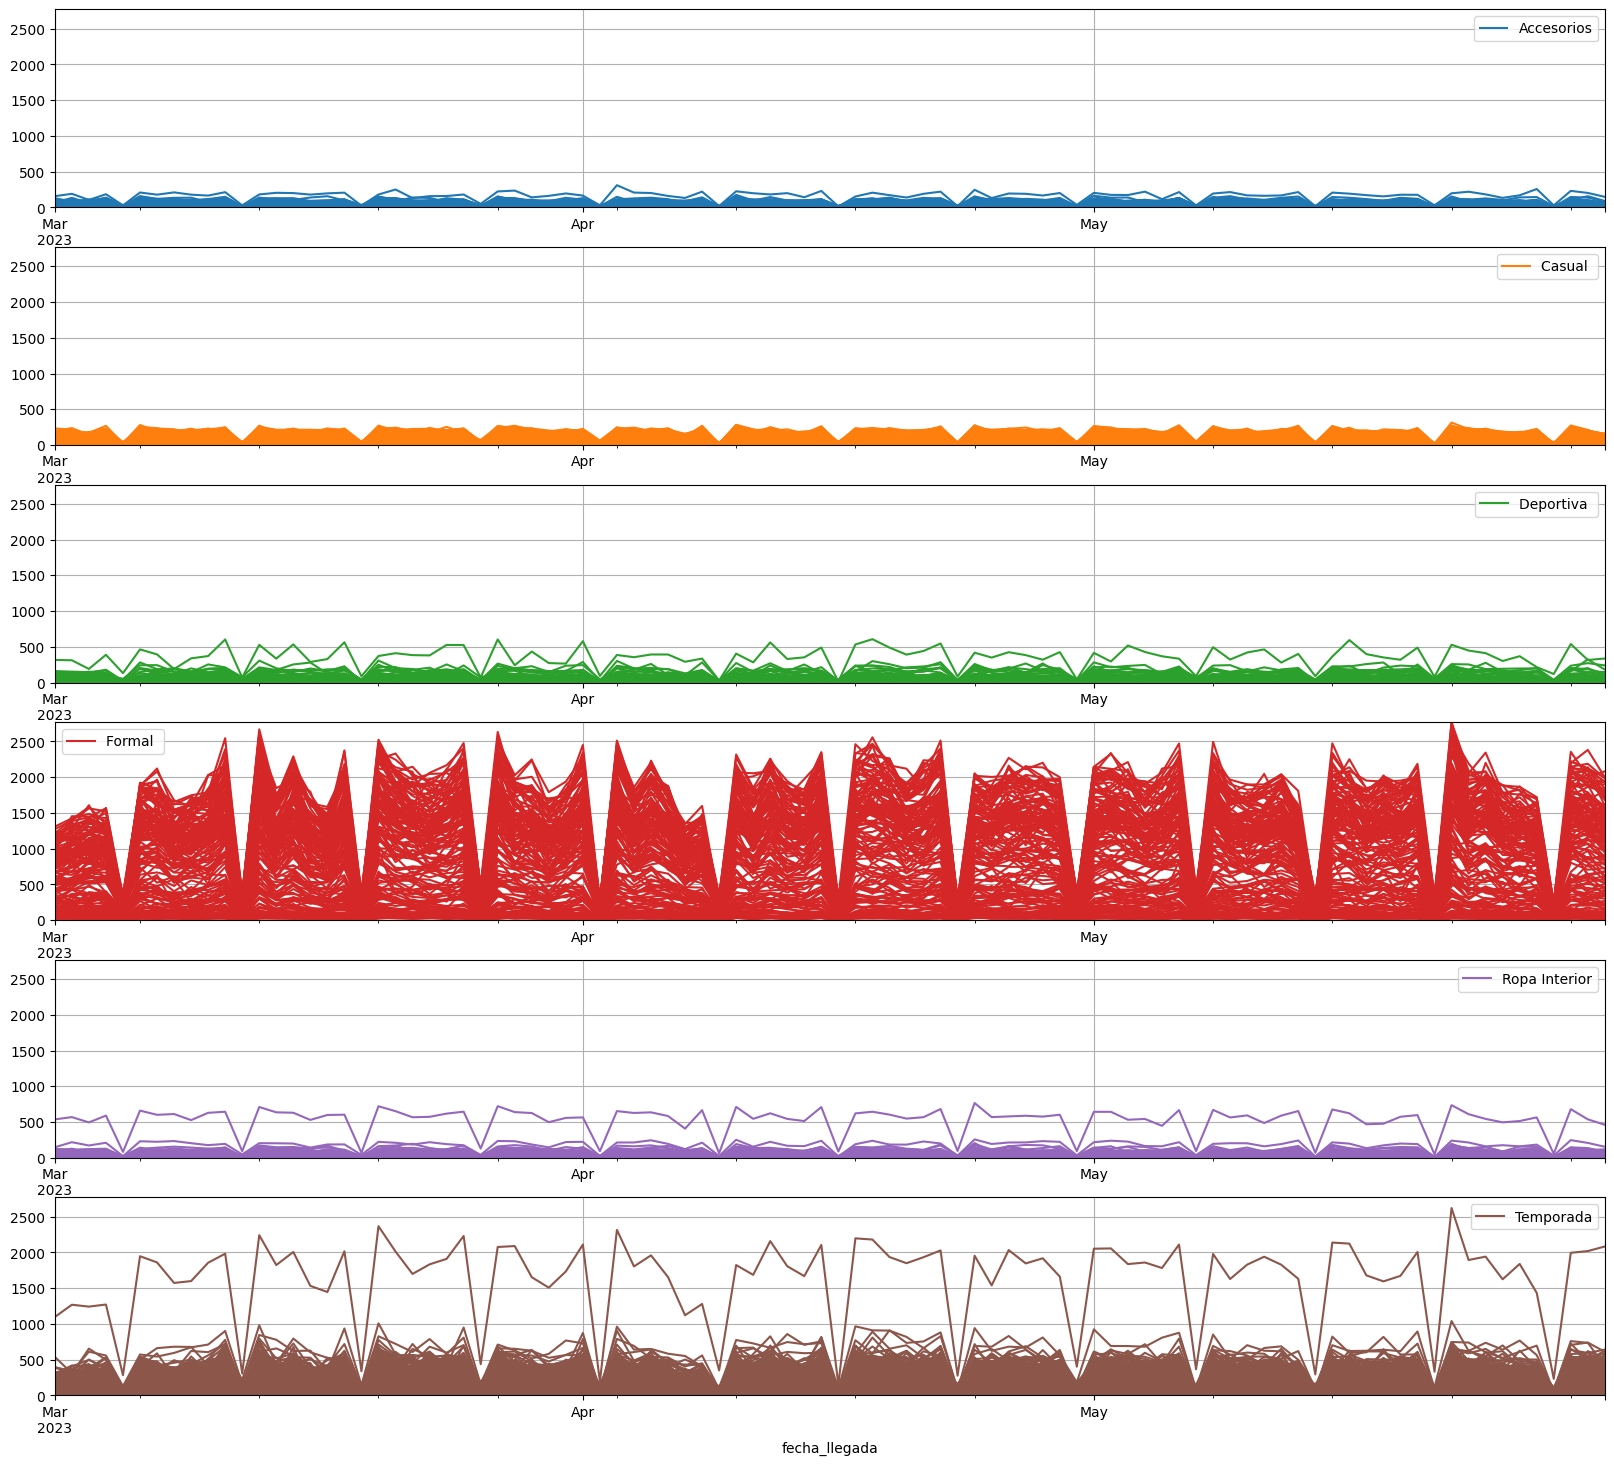

In [9]:

sku_subcats_dict = sku_subcats.set_index('sku')['subcategoria'].to_dict()

# Assign colors by subcategory
unique_subcategories = sku_subcats['subcategoria'].unique()

# Subplots
fig, axs = plt.subplots(len(sku_subcats['subcategoria'].unique()), figsize=(20, len(sku_subcats['subcategoria'].unique()) * 3))

# Calculate the overall max demand across all SKUs in the DataFrame
global_max_demand = df.max().max()

# Define color palette
colors = plt.cm.tab10(range(len(unique_subcategories)))  # Assign a color per category

# Loop over each category to create a separate DataFrame for each and plot it
for idx, category in enumerate(unique_subcategories):
    # Select SKUs that belong to the current category
    skus_in_category = [sku for sku, cat in sku_subcats_dict.items() if cat == category]
    
    # Filter the main DataFrame to include only these SKUs
    subcategory_df = df[skus_in_category]
    
    # Plot the sum of demand for this category over time
    subcategory_df.plot(ax=axs[idx], color=colors[idx], label=category, legend=False)
    
    # Set the y-limit for each subplot to the global maximum demand
    axs[idx].set_ylim(0, global_max_demand)
    
    # Add details to plot
    axs[idx].legend([category])
    axs[idx].grid()

plt.show()

In [10]:
# Plot demand by material category

skus_matcat = pd.read_sql_query('select sku, categoria_material from Catalogo_Productos group by sku;', con)

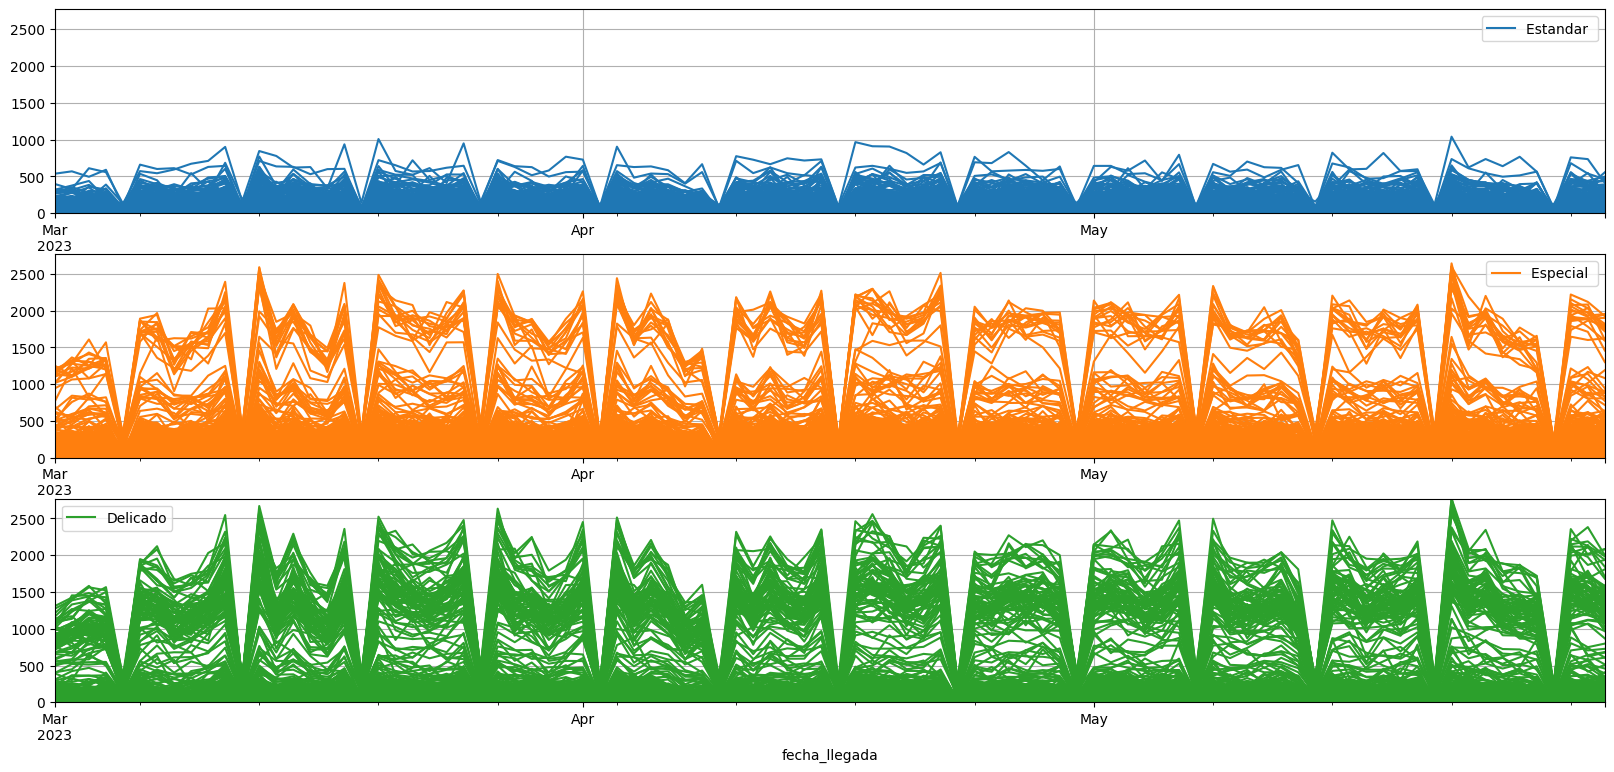

In [11]:

skus_matcat_dict = skus_matcat.set_index('sku')['categoria_material'].to_dict()

# Assign colors by subcategory
unique_categories_material = skus_matcat['categoria_material'].unique()

fig, axs = plt.subplots(len(skus_matcat['categoria_material'].unique()), figsize = (20,len(skus_matcat['categoria_material'].unique()) * 3))

# Calculate the overall max demand across all SKUs in the DataFrame
global_max_demand = df.max().max()

# Define color palette
colors = plt.cm.tab10(range(len(unique_categories_material)))  # Assign a color per category

# Loop over each category to create a separate DataFrame for each and plot it
for idx, category_material in enumerate(unique_categories_material):
    # Select SKUs that belong to the current category
    skus_in_category = [sku for sku, cat in skus_matcat_dict.items() if cat == category_material]
    
    # Filter the main DataFrame to include only these SKUs
    category_df = df[skus_in_category]
    
    # Plot the sum of demand for this category over time
    category_df.plot(ax=axs[idx], color=colors[idx], legend=False)
    
    # Set the y-limit for each subplot to the global maximum demand
    axs[idx].set_ylim(0, global_max_demand)
    
    # Add details to plot
    axs[idx].legend([category_material])
    axs[idx].grid()

plt.show()

In [12]:
# Plot demand by sum of quantity per date per subcategory
df_subcats = pd.read_sql('select mel.fecha_llegada, sum(mel.quantity) as sum_quantity, cp.subcategoria from Demanda_Historica_Melted as mel left join main.Catalogo_Productos as cp on cp.sku = mel.SKU group by mel.fecha_llegada, subcategoria', con)

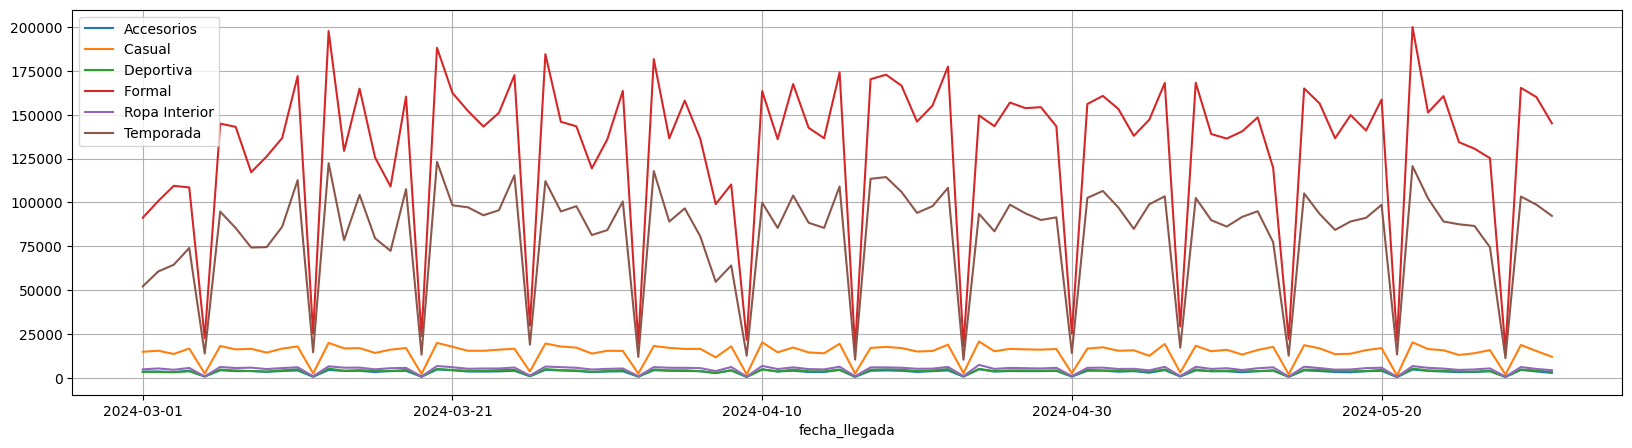

In [13]:
fig, ax = plt.subplots(figsize=(20, 5))

for cat in df_subcats['subcategoria'].unique():
    temp_df = df_subcats[df_subcats['subcategoria'] == cat]
    temp_df.plot(x='fecha_llegada', y='sum_quantity', ax=ax, label=cat)

# Add details to plot
ax.grid()
plt.show()


In [14]:
# Plot demand by product name

sku_names = pd.read_sql_query('select sku, nombre_producto from Catalogo_Productos group by sku;', con)

In [15]:
sku_names_dict = sku_names.set_index('sku')['nombre_producto'].to_dict()

# Assign colors by subcategory
sku_names_unique = sku_names['nombre_producto'].unique()

#fig, axs = plt.subplots(len(sku_names['nombre_producto'].unique()), figsize=(20, len(sku_names['nombre_producto'].unique()) * 3))

# Calculate the overall max demand across all SKUs in the DataFrame
global_max_demand = df.max().max()

# Add dfs to a dictionary
sku_names_df_dict = {}

# Loop over each category to create a separate DataFrame for each and plot it
for idx, name in enumerate(sku_names_unique):
    # Select SKUs that belong to the current category
    skus_in_name = [sku for sku, nam in sku_names_dict.items() if nam == name]
    
    # Filter the main DataFrame to include only these SKUs
    names_df = df[skus_in_name]
    
    # Append to dictionary
    sku_names_df_dict[name] = names_df
    
    # Plot the sum of demand for this category over time
    #names_df.plot(ax=axs[idx], legend=False)
    
    # Set the y-limit for each subplot to the global maximum demand
    #axs[idx].set_ylim(0, global_max_demand)
    
    # Add details to plot
    #axs[idx].legend([name])
    #axs[idx].grid()

#plt.show()

c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retval

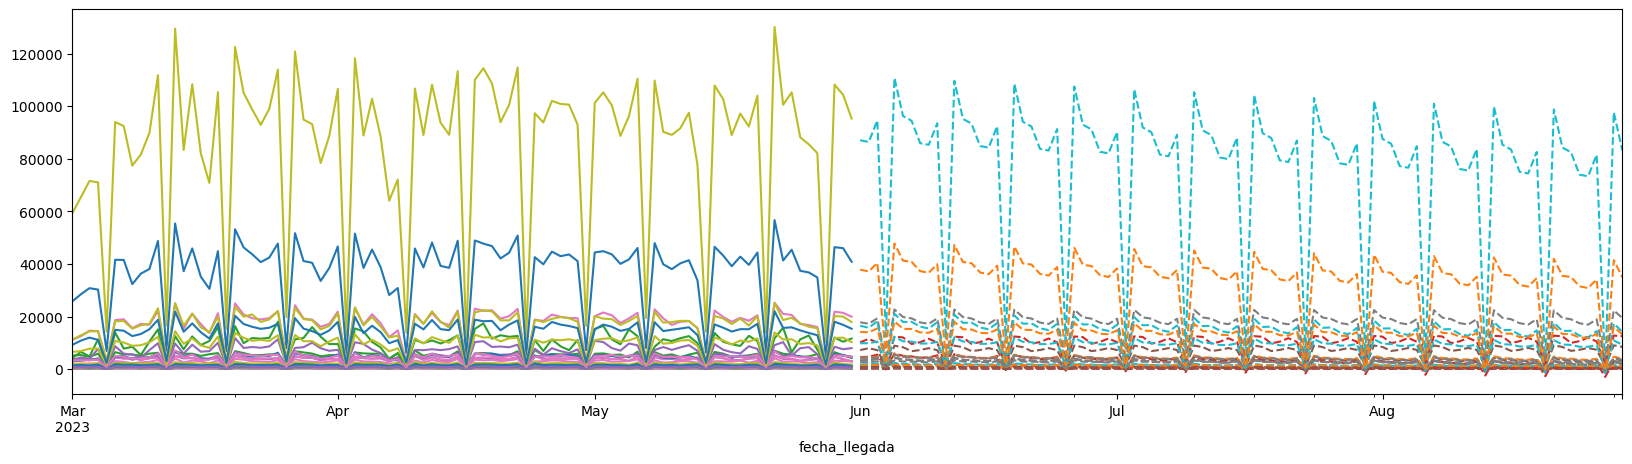

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Dictionary to store aggregated data
sku_names_daily_demand = {}

# Iterate over the dictionary to sum SKU-level demand for each category
for category, df in sku_names_df_dict.items():
    # Ensure the index is datetime if it isn't already
    df.index = pd.to_datetime(df.index)
    
    # Aggregate demand by summing all SKU columns for each day
    sku_names_daily_demand[category] = df.sum(axis=1)

fig, ax = plt.subplots(figsize = (20,5))

for category, df in sku_names_daily_demand.items():
    # Fit the Holt-Winters model
    model = ExponentialSmoothing(sku_names_daily_demand[category], trend='add', seasonal='add', seasonal_periods=7, freq='D').fit()
    forecast = model.forecast(90)   
    forecast_dates = pd.date_range(sku_names_daily_demand[category].index[-1] + pd.Timedelta(days=1), periods=90)
    forecast_df = pd.DataFrame({
        'Historical Demand': sku_names_daily_demand[category],
        'Forecasted Demand': forecast
    }, index=sku_names_daily_demand[category].index.append(forecast_dates))


    # Plot the historical demand and forecasted demand
    sku_names_daily_demand[category].plot(ax=ax, label='Demand')
    forecast_df['Forecasted Demand'].plot(ax=ax, label='Forecast', linestyle='--')

plt.show()

In [113]:
# Dictionary to store aggregated data
sku_names_daily_demand = {}

# Iterate over the dictionary to sum SKU-level demand for each category
for category, df in sku_names_df_dict.items():
    # Ensure the index is datetime if it isn't already
    df.index = pd.to_datetime(df.index)
    
    # Aggregate demand by summing all SKU columns for each day
    sku_names_daily_demand[category] = df.sum(axis=1)

sku_names_daily_demand

{'Cinturones ': fecha_llegada
 2023-03-01     923
 2023-03-02     906
 2023-03-03     823
 2023-03-04    1000
 2023-03-05     149
               ... 
 2023-05-27     983
 2023-05-28     114
 2023-05-29    1184
 2023-05-30     953
 2023-05-31     675
 Length: 92, dtype: int64,
 'Gorras': fecha_llegada
 2023-03-01    666
 2023-03-02    688
 2023-03-03    638
 2023-03-04    682
 2023-03-05    108
              ... 
 2023-05-27    691
 2023-05-28     52
 2023-05-29    843
 2023-05-30    680
 2023-05-31    540
 Length: 92, dtype: int64,
 'Sombreros': fecha_llegada
 2023-03-01    528
 2023-03-02    551
 2023-03-03    487
 2023-03-04    648
 2023-03-05    122
              ... 
 2023-05-27    577
 2023-05-28     40
 2023-05-29    680
 2023-05-30    574
 2023-05-31    414
 Length: 92, dtype: int64,
 'Bufandas': fecha_llegada
 2023-03-01    339
 2023-03-02    353
 2023-03-03    313
 2023-03-04    371
 2023-03-05     50
              ... 
 2023-05-27    343
 2023-05-28     19
 2023-05-29    412
